A ternary search tree (TST) is a type of trie-based data structure optimized for storing and retrieving strings efficiently, especially when supporting prefix-based operations like autocomplete.

It supports the following operations:

* insert a string into the TST;
* search for a string in the TST;
* return the number of stored strings;
* print all strings stored in the TST in lexicographic order;
* find all strings that start with a given prefix (autocomplete feature).

# Implementation

We implement two classes, one to represent a node of a ternary search tree, the second to represent the tree.  Only the latter will be used by the user of the data structure, the `TSTNode` class is only for intermal usage.

In [1]:
# import TSTree
from tstree.tstree import TSTree

# Example usage

Create an empty Ternary Search Tree

In [2]:
tst = TSTree()

Display it in íts current state

In [3]:
print(tst)

empty tree


Verify that it has no strings stored

In [4]:
len(tst)

0

Insert the string 'abc'

In [5]:
tst.insert('abc')

Verify that the string now encodes a single string

In [6]:
len(tst)  

1

Insert a second string

In [7]:
tst.insert('aqc')

Now the string has two elements

In [8]:
print(tst)

'a' (end=False)
  'b' (end=False)
    'c' (end=True)
    'q' (end=False)
      'c' (end=True)


Add a third string

In [9]:
tst.insert('aaq')

In [10]:
print(tst)

'a' (end=False)
  'b' (end=False)
    'a' (end=False)
      'q' (end=True)
    'c' (end=True)
    'q' (end=False)
      'c' (end=True)


Search for a string that is inserted into the ternary tree

In [11]:
tst.search('aaq')

True

List all strings in ternary search tree

In [12]:
tst.all_strings()

['aaq', 'abc', 'aqc']

Search for a prefix 'aa'

In [13]:
tst.starts_with('aa')

['aaq']

# Testing

Create a new TSTree and insert some new words

This testing includes: 
* Verify the length of the data structure after insert file "insert_words.txt"
* Verify that all words in the file "insert_words.txt" can be found
* Check that words in the file 'not_insert_words.txt' can not be found in the tree
* Check that all strings are returned

In [14]:
# import the test class
from tests.tests_tstree import TSTreeTester


In [15]:
tester = TSTreeTester(
    insert_path="data/insert_words.txt",
    not_insert_path="data/not_insert_words.txt"
)
tester.run_all_tests()


Running TSTree tests...
All tests passed.


# Performance

To assess the performance with large dataset, we use file 'corncob_lowercase.txt' (58110 words, all lower case)

In [16]:
import matplotlib.pyplot as plt


# Import benchmark functions
from benchmark.benchmark import (
    load_words,
    benchmark_insert,
    benchmark_search_fixed_sample,
    benchmark_search_random_sample
)


In [18]:
import os
# Load words
data_path = os.path.join("data", "corncob_lowercase.txt")
words = load_words(data_path)

# Define sizes
sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 30_000, 40_000, 50_000]

# Load words
data_path = os.path.join("data", "corncob_lowercase.txt")
words = load_words(data_path)

# Define sizes
sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 30_000, 40_000, 50_000]

# Plot result
def plot_results(results_dict, title, ylabel):
    plt.figure(figsize=(8, 5))
    plt.plot(list(results_dict.keys()), list(results_dict.values()), marker='o')
    plt.title(title)
    plt.xlabel("Number of Words")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

To assess the performance with large dataset, we use file 'corncob_lowercase.txt' (58110 words, all lower case)

In [19]:
len(words)

58110

The words are alphabetically ordered

In [20]:
words[:10]

['ardvark',
 'aardwolf',
 'aaron',
 'aback',
 'abacus',
 'abaft',
 'abalone',
 'abandon',
 'abandoned',
 'abandonmaent']

Now we will time how long it takes to **insert words** into a TSTree of 9 sizes.

In [21]:
insert_results = benchmark_insert(words, sizes)


Insert Performance Benchmark
     100 words → Insert avg: 0.20 ms
     500 words → Insert avg: 0.00 ms
    1000 words → Insert avg: 0.20 ms
    5000 words → Insert avg: 0.10 ms
   10000 words → Insert avg: 0.10 ms
   20000 words → Insert avg: 0.20 ms
   30000 words → Insert avg: 0.10 ms
   40000 words → Insert avg: 0.10 ms
   50000 words → Insert avg: 0.10 ms


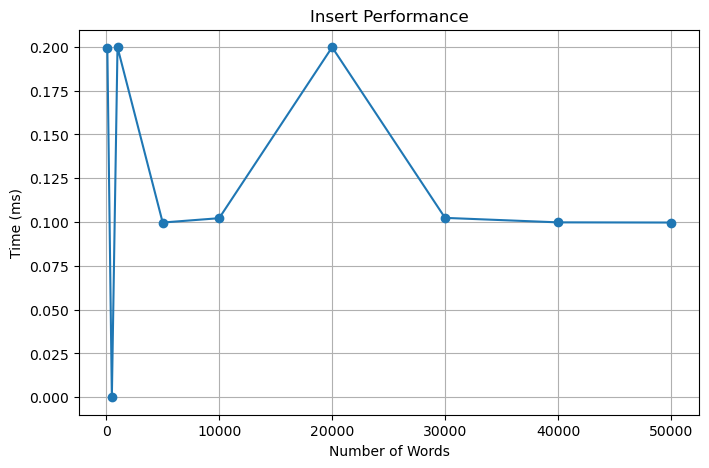

In [22]:
plot_results(insert_results, "Insert Performance", "Time (ms)")

We do the same for **searching words** in TSTree.

In [23]:
fixed_search_results = benchmark_search_fixed_sample(words, sizes)


Search Performance (Fixed Sample)
     100 words → Search avg: 0.10 ms
     500 words → Search avg: 0.20 ms
    1000 words → Search avg: 0.11 ms
    5000 words → Search avg: 0.10 ms
   10000 words → Search avg: 0.10 ms
   20000 words → Search avg: 0.10 ms
   30000 words → Search avg: 0.10 ms
   40000 words → Search avg: 0.10 ms
   50000 words → Search avg: 0.21 ms


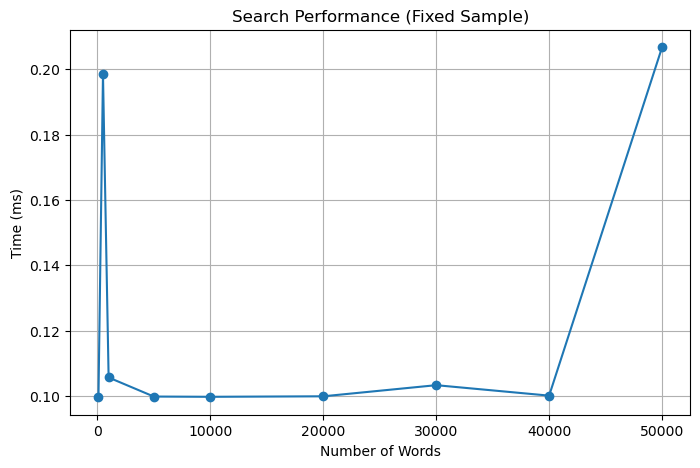

In [24]:
plot_results(fixed_search_results, "Search Performance (Fixed Sample)", "Time (ms)")


In [25]:
random_search_results = benchmark_search_random_sample(words, sizes)


Search Performance (Random from Inserted)
     100 words → Search avg (random): 0.10 ms
     500 words → Search avg (random): 0.30 ms
    1000 words → Search avg (random): 0.30 ms
    5000 words → Search avg (random): 0.10 ms
   10000 words → Search avg (random): 0.31 ms
   20000 words → Search avg (random): 0.23 ms
   30000 words → Search avg (random): 0.10 ms
   40000 words → Search avg (random): 0.30 ms
   50000 words → Search avg (random): 0.10 ms


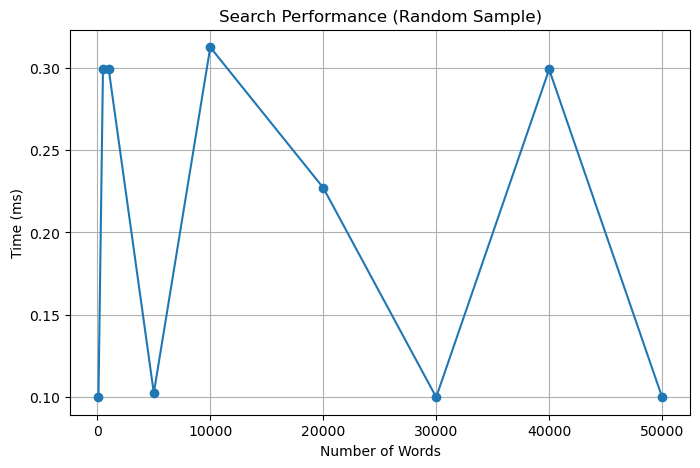

In [26]:
plot_results(random_search_results, "Search Performance (Random Sample)", "Time (ms)")

# Comparision with SET

In [27]:
from benchmark.benchmark import compare_with_set


In [28]:
compare_with_set(words)


----------------------------------------------

Comparing TSTree and Python set for 100-word 
Insert time (set):     12.1004 ms
Insert time (TSTree):  641.8870 ms
Search time (set):     0.0000 ms
Search time (TSTree):  0.0000 ms


* Set is faster than TSTree in both `Insert` and `Search` 
* But TST provides unique prefix search capabilities

# Comparision with BTree

In [29]:
# Now import TSTree
from btree.btree import Btree
from tstree.tstree import TSTree

In [30]:
btree = Btree()
btree.insert('abc')
btree.insert('aqc')
btree.insert('aaq')
print(btree)

abc
  aaq
  aqc


In [31]:
tst = TSTree()
tst.insert('abc')
tst.insert('aqc')
tst.insert('aaq')
print(tst)

'a' (end=False)
  'b' (end=False)
    'a' (end=False)
      'q' (end=True)
    'c' (end=True)
    'q' (end=False)
      'c' (end=True)


TSTree stores characters instead of full words.

In [32]:
from benchmark.benchmark import compare_btree_tstree
import random

random.shuffle(words)
insert_sample = words[:1000]                
hold_out_sample = words[1000:1100] 
compare_btree_tstree(insert_sample, hold_out_sample)


----------------------------------------------

Comparing TSTree and BTree

Inserting 1000 words...
Btree insert time:   0.0093s
TSTree insert time:  0.0172s
Btree search time:   0.0006s
TSTree search time:  0.0006s
TSTree prefix search (prefix='ca'): 0.0001s

Summary:
Operation                  Btree      TSTree
--------------------------------------------
Insert                    0.0093      0.0172
Search                    0.0006      0.0006
Prefix Search                N/A      0.0001


Insert:
* BTree is extremely fast for insertions because it doesn’t branch based on individual characters.
* TSTree processes each character of the word during insertion, making it slower.

Search:
* Both trees are fast and suitable for direct word lookups.
* BTree is faster due to its simpler structure.

All Strings:
* This is a weakness of BTree: to retrieve all stored words, it must traverse the entire tree, which is very time-consuming.
* TSTree is character-based, making it efficient to traverse and retrieve all words in dictionary order.

Prefix Search:
* BTree does not support prefix search unless the entire tree is traversed.
* TSTree supports prefix search very efficiently by following character paths.